In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Basic Terms
A DataFrame in Python is a two-dimensional, labeled data structure provided by the pandas library. It is designed to represent tabular data, similar to a spreadsheet, a table in a relational database, or a data frame in R.

NumPy → Core numerical library for Python. Handles arrays, matrices, and math operations efficiently. Foundation of most ML workflows.

Pandas → Data wrangling library. Provides DataFrames for cleaning, manipulating, and analyzing structured data.

Matplotlib → Low-level plotting library. Lets you create line charts, bar charts, scatter plots, and more.

Seaborn → High-level statistical visualization library built on Matplotlib. Simplifies creating polished, insightful plots.

Scikit-Learn (sklearn) → Machine learning library. Provides models, preprocessing tools, train/test splitting, and evaluation metrics.

In [2]:
#Load Data into DataFrame
housing = pd.read_csv('../housing.csv')
# pd.read_csv('../housing.csv')
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [3]:
print(housing.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [4]:
#checking basic info about the data
print(housing.info())
print(housing.describe())
print(housing.isna().sum())

#Handling Missing Values
# housing = housing.fillna(housing.mean())

# Alternatively, for specific columns:
# housing['total_bedrooms'] =
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].median())

#splitting the data into features and target variable
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

for col in features:
    if col not in housing.columns:
        print(f"Column {col} not found in DataFrame")

# use housing[features] (not [[features]]) and call to_numpy()
X = housing[features].to_numpy()
y = housing['median_house_value'].to_numpy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

In [5]:
# Ensure X and y are defined (in case this cell is executed before the cells that create them)

if 'X' not in globals():
	X = housing[features].to_numpy()
if 'y' not in globals():
	y = housing['median_house_value'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Scaling Features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
#Build Regression Model

from sklearn.linear_model import LinearRegression, Ridge, Lasso

#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

#Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

#Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [8]:
#Evaluate Models
from sklearn.metrics import mean_squared_error, r2_score

for model, name in zip([lr, ridge, lasso], ['Linear Regression', 'Ridge Regression', 'Lasso Regression']):
    y_pred = model.predict(X_test)
    # R2
    print(f"{name} R2: {r2_score(y_test, y_pred):,.4f}")
    # compute RMSE without using the 'squared' keyword for compatibility with older sklearn versions
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name} RMSE: {rmse:,.2f}")

Linear Regression R2: 0.6139
Linear Regression RMSE: 71,133.17
Ridge Regression R2: 0.6139
Ridge Regression RMSE: 71,129.61
Lasso Regression R2: 0.6139
Lasso Regression RMSE: 71,133.11


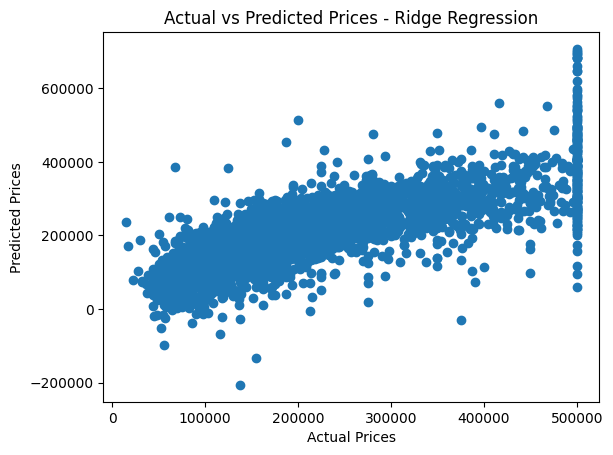

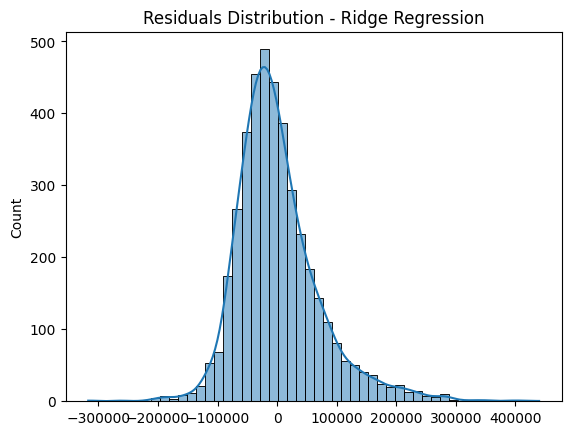

In [9]:
#Visualization

plt.scatter(y_test, ridge.predict(X_test))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices - Ridge Regression")
plt.show()

sns.histplot(y_test - ridge.predict(X_test), bins=50, kde=True)
plt.title("Residuals Distribution - Ridge Regression")
plt.show()

In [10]:
import pickle

with open('ridge_regression_model.pkl', 'wb') as f:
    pickle.dump(ridge, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [11]:
# pickle.dump(lr, open('linear_regression_model.pkl', 'wb'))